Yizhi Jiao
PHYS 29
Homework 9

In [296]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy import misc

Problem 1

Text(0.5, 1.0, 'x vs t')

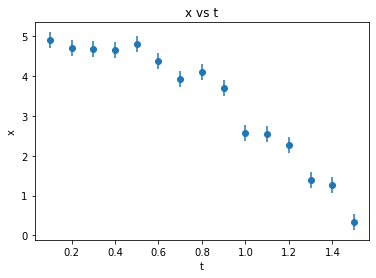

In [297]:
data = np.loadtxt('HW9Problem1data.txt')
t = data[:, 0]
x = data[:, 1]
err = data[:, 2]
plt.errorbar(t, x, yerr=err, linestyle=' ', marker='o')
plt.xlabel('t')
plt.ylabel('x')
plt.title('x vs t')

$b(t) = -\frac{1}{2}\frac{g\sin(\alpha)t^2}{x(t)-x(0)}-1$

In [298]:
def b_(x_, t_):
    return -0.5 * 9.8 * np.sin(40/180*np.pi) * t_**2 / (x_-5) -1
b = b_(x,t)
berr = np.abs(misc.derivative(b_, x, dx=1e-6, args=(t,))) * err

Text(0.5, 1.0, 'b vs t')

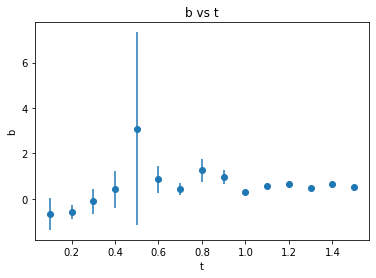

In [299]:
plt.errorbar(t, b, yerr=berr, linestyle=' ', marker='o')
plt.xlabel('t')
plt.ylabel('b')
plt.title('b vs t')

In [300]:
mean = np.sum(b/berr**2)/np.sum(1/berr**2)
sd = np.sqrt(1/(np.sum(1/berr**2)))
print('mean: {}\nstandard deviation: {}'.format(mean, sd))

mean: 0.5106799282611002
standard deviation: 0.03580786006427504


Problem 2

Text(0.5, 1.0, '$F_\\nu$ vs $\\nu$')

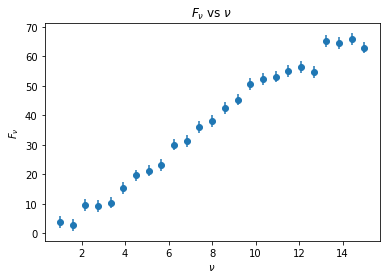

In [301]:
data = np.loadtxt('HW9Problem2data.txt')
nu = data[:, 0]
f = data[:, 1]
err = data[:, 2]
plt.errorbar(nu, f, yerr=err, linestyle=' ', marker='o')
plt.xlabel('$\\nu$')
plt.ylabel('$F_\\nu$')
plt.title('$F_\\nu$ vs $\\nu$')

In [302]:
def model_1(n, a, b, c):return a*n**2+b*n+c
par, var = optimize.curve_fit(model_1, nu, f, sigma=err)
print('a: \nvalue:{} and uncertainty: {}\nb: \nvalue:{} and uncertainty: {}\nc: \nvalue:{} and uncertainty: {}'.format(par[0], var[0,0], par[1],var[1,1], par[2], var[2,2]))

a: 
value:-0.10295752397279825 and uncertainty: 0.001096578335621046
b: 
value:6.511611910020317 and uncertainty: 0.29617209021389695
c: 
value:-6.889451291134039 and uncertainty: 3.6133077224801244


In [303]:
chisq_1 = sum((f-model_1(nu,par[0],par[1],par[2]))**2/err**2)/(25-3)
print('Reduced Chi-squared: {}'.format(chisq_1))

Reduced Chi-squared: 1.7084040136159973


Text(0.5, 1.0, 'Parabolic')

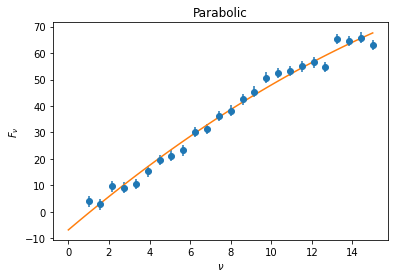

In [304]:
plt.errorbar(nu, f, yerr=err, linestyle=' ', marker='o')
plt.plot(np.linspace(0,15), model_1(np.linspace(0,15), par[0], par[1], par[2]))
plt.xlabel('$\\nu$')
plt.ylabel('$F_\\nu$')
plt.title('Parabolic')

In [305]:
def model_2(n, A, alpha, n0):return A * n**alpha * np.exp(-n/n0)
par, var = optimize.curve_fit(model_2, nu, f, sigma=err)
print('A: \nvalue:{} and uncertainty: {}\nalpha: \nvalue:{} and uncertainty: {}\nnu0: \nvalue:{} and uncertainty: {}'.format(par[0], var[0,0], par[1],var[1,1], par[2], var[2,2]))

A: 
value:1.7572440458884981 and uncertainty: 0.12589546839902485
alpha: 
value:1.8444996696875195 and uncertainty: 0.026490240082972818
nu0: 
value:10.925907273019057 and uncertainty: 4.235657124543236


In [306]:
chisq_2 = sum((f-model_2(nu,par[0],par[1],par[2]))**2/err**2)/(25-3)
print('Reduced Chi-squared: {}'.format(chisq_2))

Reduced Chi-squared: 1.0923174561644269


Text(0.5, 1.0, 'Therm')

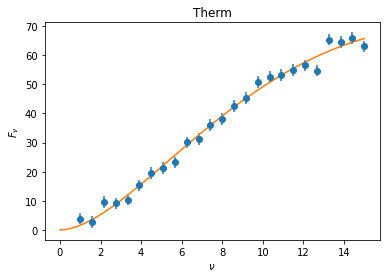

In [307]:
plt.errorbar(nu, f, yerr=err, linestyle=' ', marker='o')
plt.plot(np.linspace(0,15), model_2(np.linspace(0,15), par[0], par[1], par[2]))
plt.xlabel('$\\nu$')
plt.ylabel('$F_\\nu$')
plt.title('Therm')

The latter model has smaller chi-squared value, so the therm model provides the best fit.